#  Background and question

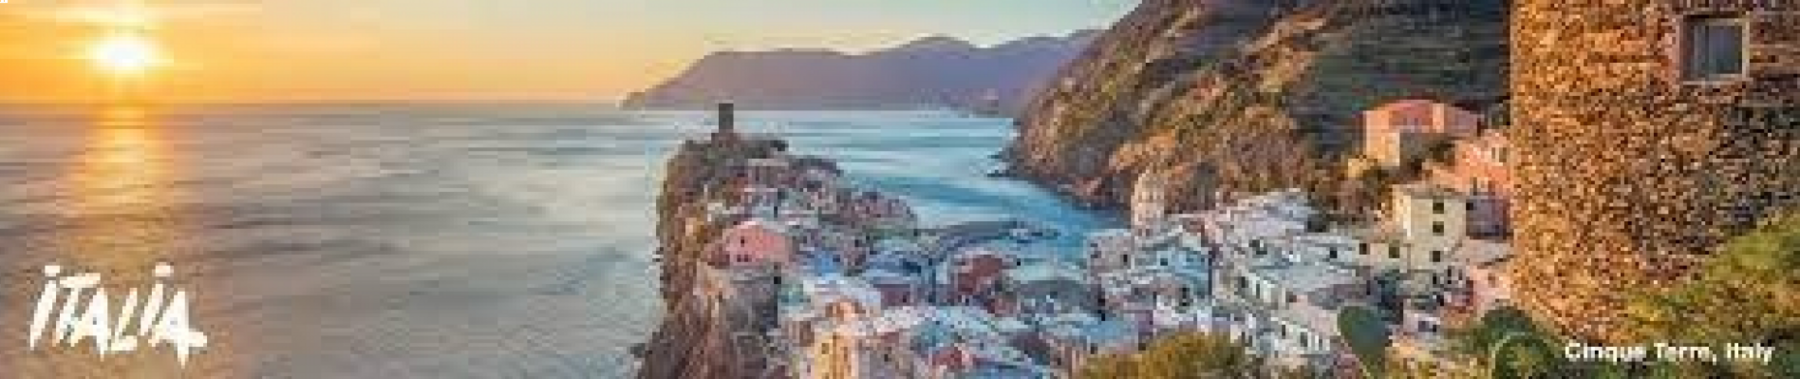
Cover of the Dataset

### Background

The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

### Source
https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021?resource=download

### Hypothesis (h1)
There is a correlation between the social support and the healthy life expectancy.

### Null hypothesis (h0)
There is no correlation between the social support and the healthy life expectancy.

# Description of the data set

### Content

The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

# Visualization and analysis


In [92]:
#import packages
import pandas as pd
import seaborn as sns
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt

In [93]:
#read data
data = pd.read_csv("world-happiness-report-2021.csv")

In [94]:
#look at dataset
data

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [95]:
#delete the column "Ladder score in Dystopia" with an if statement, so that no error code appears if you run it several times
if "Ladder score in Dystopia" in data.columns:
    del data["Ladder score in Dystopia"]
else: 
    pass

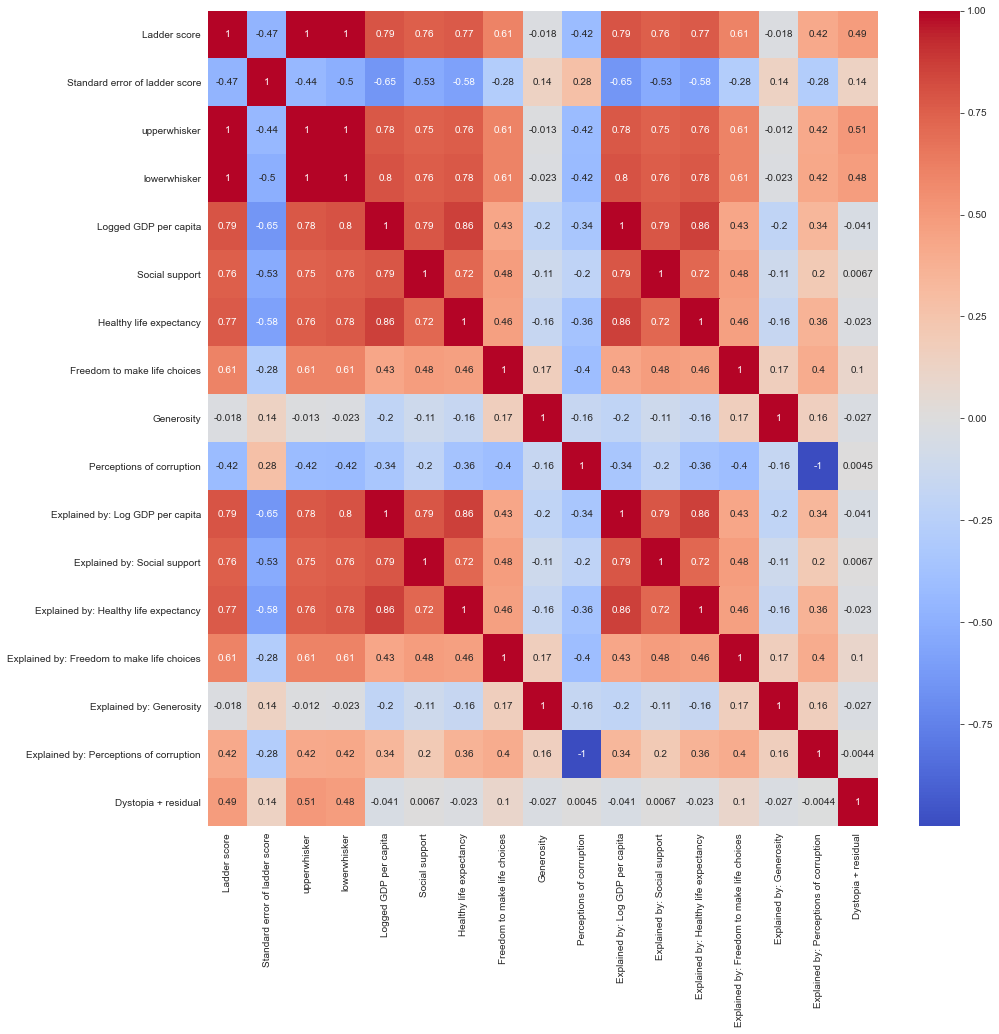

In [96]:
#generating heatmap to get overview over correlations of the columns. (the same as a correlation matrix but easier to see)
plt.figure(figsize=(15,15))
ax = sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

Here I created a heatmap. I did this to get a rough overview of the data set. I deleted the line "Ladder score in Dystopia" from the data set because it contained values that could not be expected. Here you can already see that there is a correlation between social support and healthy life expectancy.

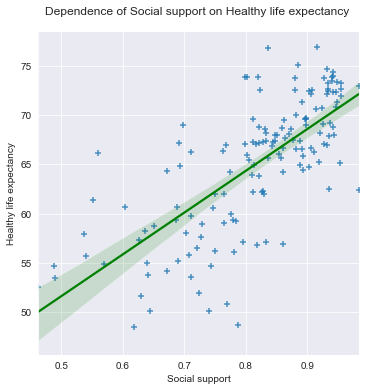

In [113]:
with sns.axes_style("darkgrid"):
    ax = sns.lmplot(x="Social support", y="Healthy life expectancy", data = data, markers="+", line_kws={'color': 'green'}).set(title='Dependence of Social support on Healthy life expectancy \n')

After taking a look at the diagram above it is clear that the data of the healthy life expectancy (y-scale) as well as the data of the social support (x-scale) forms a pattern that allows a trend line with a positive alltitude.   

In [98]:
#let the average of the two columns be output and formatted them clearly
print(f'mean "Social support":           {data["Social support"].mean()} \nmean "Healthy life expectancy":  {data["Healthy life expectancy"].mean()}')


mean "Social support":           0.8147449664429529 
mean "Healthy life expectancy":  64.99279865771811


In [99]:
# apply new columns for high and low Social support/Healthy life expectancy
data["Social support class"] = data["Social support"].apply(
    lambda x: "high" if x > 0.8 else "low" 
)
data["Healthy life expectancy class"] = data["Healthy life expectancy"].apply(
    lambda x: "high" if x > 65 else "low"
)

| Variable                     | Value |
| :---                         |  ---: |
| High social support          | high  |
| Low social support           | low   |
| High healthy life expectancy | high  |
| Low healthy life expectancy  | low   |

The names of the variables were exchanged by "high" and "low" in order of allowing the calculation of the hypothisis tests. <br>
The value of 0.8 represents a high social support due to the "discribe" function <br>
therfore the average is 0.814745. <br>

The value of 65 represents a high Healthy life expectancy according to the exact average which is 64.992799.

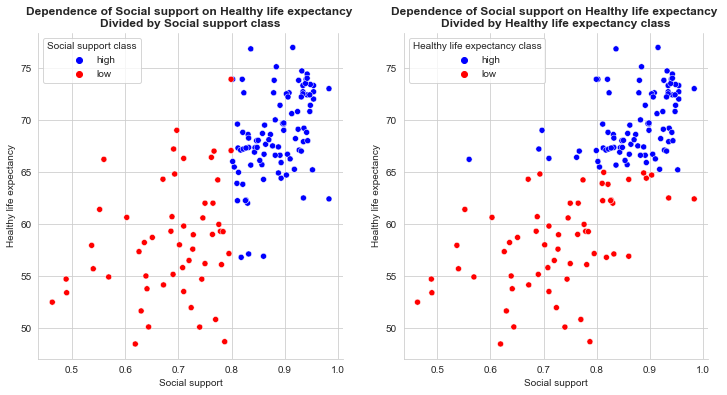

In [119]:
with sns.axes_style("whitegrid"):
    
    # initialise 1 by 2 plot area
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # create first plot
    sns.scatterplot(ax = axes[0], data=data, x='Social support', y="Healthy life expectancy", hue = 'Social support class', palette=['b', 'r'])
    axes[0].set_title("Dependence of Social support on Healthy life expectancy \nDivided by Social support class", size = 12, weight = 600)
    
    # create second plot
    ax = sns.scatterplot(ax = axes[1], data=data, x='Social support', y="Healthy life expectancy", hue = 'Healthy life expectancy class', palette=['b', 'r'])
    axes[1].set_title("Dependence of Social support on Healthy life expectancy \nDivided by Healthy life expectancy class", size = 12, weight = 600)
    
    sns.despine()

The two plots presented above offer proff for the given hypothisis (h1) that suggests that there in fact is a correlation between the social support and the healthy life expactancy.
It can thus be concluded that countries with poorly functoning social support systems rank low in terms of the healthy life expectancy whereas countries that are in the posession of better social support system often tend to rank higher on the healthy life expectancy scale.

### Correlation

In [101]:
data["Healthy life expectancy"].corr(data["Social support"])

0.7232561311738971

##### Correlation between social support and healthy life expectancy:
 
If the sign is positive, both characteristics grow equally, that means,
as one characteristic increases, so does the other. It's a linear
Connection can be seen since the value of 0.72 is close to 1.

### Chi2 independence test

In [102]:
data.groupby(["Healthy life expectancy class", "Social support class"]).size()

Healthy life expectancy class  Social support class
high                           high                    80
                               low                      8
low                            high                    16
                               low                     45
dtype: int64

In [103]:
scipy.stats.fisher_exact([[16, 45], [80, 8]])

(0.035555555555555556, 1.9694197804269998e-16)

A connection can be seen, since the p-value under the assumption of the null hypothesis is smaller than the significance level alpha = 0.05, so the null hypothesis was refuted.

### Two samples T-test

In [104]:
high = data[data["Social support class"] == "high"]["Healthy life expectancy"]
low = data[data["Social support class"] == "low"]["Healthy life expectancy"]

In [105]:
scipy.stats.ttest_ind(low, high)

Ttest_indResult(statistic=-12.59486283267127, pvalue=3.9187435257689995e-25)

Because the p-value is smaller than level alpha = 0.05 the null hypothesis (h0) can thus be refuted, this shows that there is a distingt difference between these two factors. It can therfore be concluded that the hypothesis (h1) that suggests the existence of a correlation between social support and healthy life expectancy earlier on in this document is correct. 

# Interpretation of the results

The Interpretation at the end of the presented analysis rotates around the first hypothisis which was proven to be right and which in combination with the empirical data provided by the world happiness report shows that people who live in countries that built good social support systems over that last decades for example Finland mostly inhabit people with a high healthy life expectancy who generally are happier than people who life in countries that were and are not able to provide these necessary systems. The visual representations of the given data above also support this conclusion.

Most people would have assumed this by default as it makes sense that less social support and security leads to an unhappy life and to a low healthy life expectancy, still it is important to have empirical data that supports a claim which then is not subjective.

As this Analysis allowed to find an objective truth the question that could be posed at the end of this interpretation is what we do with that truth as it is evident that there is a problem in correlation with bad to no social support and unhappy people (low healthy life expectancy).